<a href="https://colab.research.google.com/github/LOKESH2343/AIML-25_B16/blob/main/2303A51079_30_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
file_path = 'online.csv'
df = pd.read_csv(file_path)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
most_purchased_product = df['ProductRelated'].max()
most_purchased_sessions = df[df['ProductRelated'] == most_purchased_product].shape[0]
most_purchased_product, most_purchased_sessions

(705, 1)

In [11]:
special_day_purchases = df[df['Revenue']].groupby('SpecialDay').size().sort_values(ascending=False)
most_purchased_special_day = special_day_purchases.idxmax()
most_purchased_special_day_count = special_day_purchases.max()
most_purchased_special_day, most_purchased_special_day_count

(0.0, 1831)

In [12]:
df['PurchaseDate'] = pd.to_datetime(df['Month'], errors='coerce', format='%b')
df['SpecialDay_Purchases'] = df['SpecialDay'] * df['Revenue']
special_day_purchases = df[df['Revenue']].groupby('SpecialDay').size().sort_values(ascending=False)
special_day_purchases.head(5)

,0
SpecialDay,
0.0,1831
0.6,29
0.2,14
0.4,13
0.8,11


In [13]:
purchases_by_month = df[df['Revenue']].groupby('Month').size().sort_values(ascending=False)
most_purchased_month = purchases_by_month.idxmax()
purchases_by_month, most_purchased_month

(Month
 Nov     760
 May     365
 Dec     216
 Mar     192
 Oct     115
 Sep      86
 Aug      76
 Jul      66
 June     29
 Feb       3
 dtype: int64,
 'Nov')

In [14]:
max_revenue = df['PageValues'].max()
min_revenue = df['PageValues'].min()
max_revenue, min_revenue

(361.7637419, 0.0)

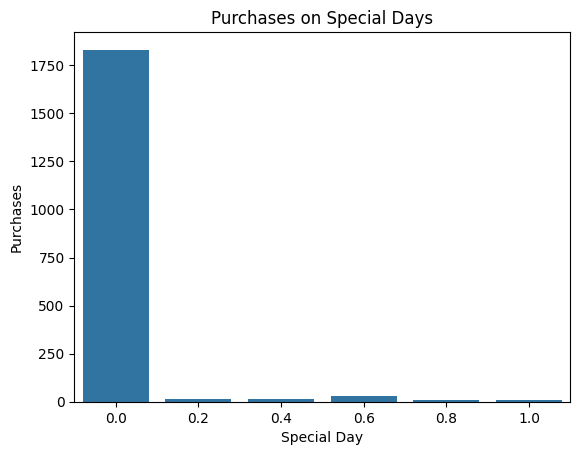

In [15]:
sns.barplot(x=special_day_purchases.index, y=special_day_purchases.values)
plt.xlabel('Special Day')
plt.ylabel('Purchases')
plt.title('Purchases on Special Days')
plt.show()